<a href="https://colab.research.google.com/github/anirxudh/Deep-Learning-Lab-Tutorial-KTU/blob/main/Exp_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPERIMENT NO 7
## Anirudh S Nair
### IMDB analysis using RNN

# Import Libraries

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, datasets
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Data Loading and Preprocessing

In [8]:
n=10000
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=n)
max_len=500
x_train=pad_sequences(x_train, maxlen=max_len)
x_test=pad_sequences(x_test, maxlen=max_len)

# Model Building and Compiling

In [10]:
model=models.Sequential([
    layers.Embedding(input_dim=n, output_dim=32, input_length=max_len),
    layers.SimpleRNN(32),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Fitting

In [14]:
r=model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 152ms/step - accuracy: 0.5945 - loss: 0.6463 - val_accuracy: 0.7434 - val_loss: 0.5465
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 130s 136ms/step - accuracy: 0.8379 - loss: 0.3857 - val_accuracy: 0.7462 - val_loss: 0.5165
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 133ms/step - accuracy: 0.8505 - loss: 0.3532 - val_accuracy: 0.8238 - val_loss: 0.3978
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 133ms/step - accuracy: 0.9198 - loss: 0.2111 - val_accuracy: 0.6381 - val_loss: 0.6347
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 146s 138ms/step - accuracy: 0.7638 - loss: 0.4795 - val_accuracy: 0.6769 - val_loss: 0.6075
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 134ms/step - accuracy: 0.8302 - loss: 0.3810 - val_accuracy: 0.7065 - val_loss: 0.6110
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 136ms/step - accuracy: 0.8832 - loss: 0.2822 - val_accuracy: 0.6717 - val_loss: 0.6635
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 135ms/step - accuracy: 0.9067 -

# Plotting

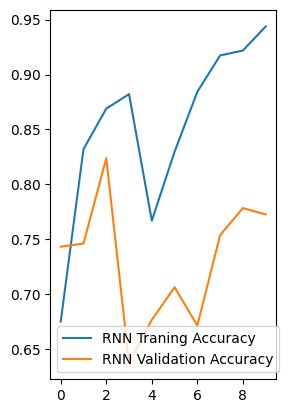

In [18]:
plt.subplot(1,2,1)
plt.plot(r.history['accuracy'], label='RNN Traning Accuracy')
plt.plot(r.history['val_accuracy'], label='RNN Validation Accuracy')
plt.legend()
plt.show()

# Checking Predictions
### This is done to check our models performance(value comparison) and not the actual model prediction check

In [20]:
predict=model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step


In [21]:
print(x_test[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [22]:
print(y_test[1])

1


In [23]:
print(predict[1])

[0.99956244]


In [27]:
print(y_test[201])

0


In [28]:
print(predict[201])

[0.03663073]


#### We can see that the values are very close and hence evaluting our RNN model's Sentiment analysis capability